# Explore here

In [3]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
# load the .env file variables
load_dotenv()



True

In [5]:
#inizializar api

from spotipy.oauth2 import SpotifyClientCredentials
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')



con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [7]:
#hacemos peticion a la API
artist_id = "2ye2Wgw4gimLv2eAKyk1NB"

response = con.artist_top_tracks(artist_id)

if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [8]:
#hacemos el dataframe de las 10 mejores ordenadas OH YEAHH!!!
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                         name  popularity
7     5.081550           Whiskey In The Jar          60
9     6.953767   Fade To Black (Remastered)          60
5     6.452667  The Unforgiven (Remastered)          61


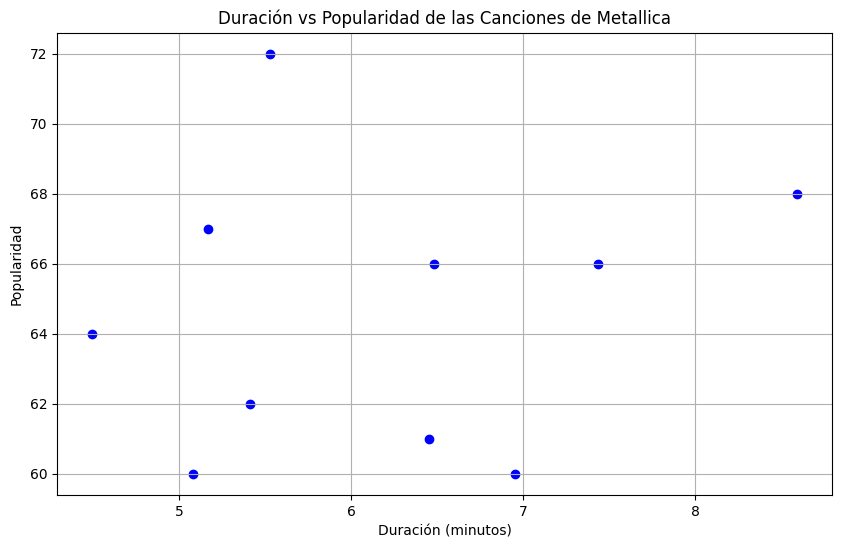

In [10]:
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tracks_df['duration_ms'], tracks_df['popularity'], color='blue')
plt.title('Duración vs Popularidad de las Canciones de Metallica')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)

# Mostrar el gráfico
plt.show()

No tienen relacion ninguna la duracion de la cancion con la popularidad, simplemente son Exitos quede la MEJOR BANDA DE HEAVY METAL DE LA HISTORIA!!! 